In [26]:
#librairy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
#import scipy as sp
import scipy

# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [20]:
df = pd.read_csv('data/tennis.csv')

df = df.dropna()
#df = df.fillna(0)
x = sm.add_constant(pd.get_dummies(df.surface, drop_first=True))
y = df["player1 total points total"]

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     player1 total points total   R-squared:                       0.036
Model:                                    OLS   Adj. R-squared:                  0.032
Method:                         Least Squares   F-statistic:                     11.76
Date:                        Wed, 20 Jan 2021   Prob (F-statistic):           2.45e-09
Time:                                20:34:23   Log-Likelihood:                -5516.9
No. Observations:                        1016   AIC:                         1.104e+04
Df Residuals:                            1011   BIC:                         1.107e+04
Df Model:                                   4                                         
Covariance Type:                          HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            159.1754      7.543     21.102      0.000     144.391     173.960
Indoor: Hard     -16.3043      8.031     -2.030      0.042     -32.045      -0.563
Outdoor: Clay      5.3477      8.579      0.623      0.533     -11.467      22.162
Outdoor: Grass    21.3810      9.715      2.201      0.028       2.340      40.422
Outdoor: Hard      2.0928      8.001      0.262      0.794     -13.589      17.775
==============================================================================
Omnibus:                      168.057   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.988
Skew:                           1.027   Prob(JB):                     1.45e-64
Kurtosis:                       4.651   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

1. The dropped surface is "indoor clay", in the summaryy, the coefficients represent the average difference between the Federrer's point on the surface and the dropped surface. The indoor: Hard and the outdoor grass have a significant difference because their p-value < 0.05. 

2. Yes we need a constant because it allows us to represent the y-intercept and the mean of the observation. Otherwise, the coefficients can't be interpreted as a true increase in score. 

3. 

In [31]:
#3 
scipy.stats.ttest_ind_from_stats(21.3810, 2.0928, 9.715, 8.001, 4.651, 1016)

#From the result we could say that it is statistically significant

Ttest_indResult(statistic=8.95455515464425, pvalue=1.5755538871476097e-18)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [203]:
df_titanic = sns.load_dataset('titanic')

df_titanic.columns
#data cleaning 

#df_titanic['class'] = df_titanic['class'].astype(str)
df_titanic['deck'] = df_titanic['deck'].astype('object')
#df_titanic['age'] = df_titanic.age.fillna(0)
df_titanic['missing_age'] = (df_titanic.age == 0).astype(str)
df_titanic = df_titanic.dropna()

#drop useless columns 
x = df_titanic.drop(columns = ['alive', 'survived', 'deck', 'embark_town', 'missing_age'], axis=1)


qual_val = ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']
quant_val = ['pclass', 'age', 'sibsp', 'parch', 'fare']

dummies = pd.get_dummies(data=x, columns=qual_val, drop_first=True)

df_titanic.dropna()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,missing_age
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False


In [204]:
#square the quantitative

x_2 = x[quant_val].apply(np.square)
x_2.columns = df_titanic[quant_val].columns+"_2"
df_2 = pd.concat((x, x_2), axis=1)
x_2

,pclass_2,age_2,sibsp_2,parch_2,fare_2
1,1,1444.0,1,0,5081.308859
3,1,1225.0,1,0,2819.610000
6,1,2916.0,0,0,2689.718906
10,9,16.0,1,1,278.890000
11,1,3364.0,0,0,704.902500
...,...,...,...,...,...
871,1,2209.0,1,1,2761.943938
872,1,1089.0,0,0,25.000000
879,1,3136.0,0,1,6915.302859
887,1,361.0,0,0,900.000000


In [215]:
# x_3 the quant value 
x_3 = x[quant_val] ** 3
x_3.columns = df_titanic[quant_val].columns+"_3"
#df_2 = pd.concat((x, x_3), axis=1)


#final df 

df_final = dummies.join(x_2)
df_final = df_final.join(x_3)
df_final

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,pclass_2,age_2,sibsp_2,parch_2,fare_2,pclass_3,age_3,sibsp_3,parch_3,fare_3
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,1,1444.0,1,0,5081.308859,1.0,54872.0,1.0,0.0,362212.463781
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,1,1225.0,1,0,2819.610000,1.0,42875.0,1.0,0.0,149721.291000
6,1,54.0,0,0,51.8625,1,0,1,0,0,...,1,2916.0,0,0,2689.718906,1.0,157464.0,0.0,0.0,139495.546775
10,3,4.0,1,1,16.7000,0,0,1,0,1,...,9,16.0,1,1,278.890000,27.0,64.0,1.0,1.0,4657.463000
11,1,58.0,0,0,26.5500,0,0,1,0,0,...,1,3364.0,0,0,704.902500,1.0,195112.0,0.0,0.0,18715.161375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,1,0,0,...,1,2209.0,1,1,2761.943938,1.0,103823.0,1.0,1.0,145151.754088
872,1,33.0,0,0,5.0000,1,0,1,0,0,...,1,1089.0,0,0,25.000000,1.0,35937.0,0.0,0.0,125.000000
879,1,56.0,0,1,83.1583,0,0,0,0,0,...,1,3136.0,0,1,6915.302859,1.0,175616.0,0.0,1.0,575064.829730
887,1,19.0,0,0,30.0000,0,0,1,0,0,...,1,361.0,0,0,900.000000,1.0,6859.0,0.0,0.0,27000.000000


In [216]:
#fit the model 
x = df_final
x = sm.add_constant(x)
y = df_titanic['survived']
x = x.astype(float)
#y = y.astype(float)
y
est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 19
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     141.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           4.17e-90
Time:                        09:27:21   Log-Likelihood:                -66.910
No. Observations:                 182   AIC:                             175.8
Df Residuals:                     161   BIC:                             243.1
Df Model:                          20                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2870      0.199      1.442      0.149      -0.103       0.677
pclass              0.1899      0.132      1.440      0.150      -0.069       0.448
age                 0.0776      0.028      2.765      0.006       0.023       0.133
sibsp              -0.1841      0.303     -0.607      0.544      -0.779       0.411
parch              -0.0261      0.236     -0.111      0.912      -0.488       0.436
fare                0.0011      0.003      0.420      0.674      -0.004       0.006
sex_male            0.4284      0.200      2.147      0.032       0.037       0.820
embarked_Q         -0.4028      0.285     -1.415      0.157      -0.961       0.155
embarked_S         -0.0686      0.064     -1.077      0.281      -0.193       0.056
class_Second       -0.1558      0.129     -1.208      0.227      -0.409       0.097
class_Third         0.0293      0.028      1.056      0.291      -0.025       0.084
who_man            -0.6405      0.139     -4.598      0.000      -0.914      -0.367
who_woman          -0.2833      0.185     -1.532      0.126      -0.646       0.079
adult_male_True    -0.6405      0.139     -4.598      0.000      -0.914      -0.367
alone_True         -0.0484      0.131     -0.370      0.711      -0.305       0.208
pclass_2            0.0544      0.057      0.956      0.339      -0.057       0.166
age_2              -0.0020      0.001     -2.581      0.010      -0.004      -0.000
sibsp_2             0.2690      0.267      1.006      0.314      -0.255       0.793
parch_2            -0.0375      0.168     -0.223      0.824      -0.367       0.292
fare_2          -1.446e-05   1.44e-05     -1.006      0.314   -4.26e-05    1.37e-05
pclass_3           -0.0406      0.030     -1.372      0.170      -0.098       0.017
age_3            1.476e-05   6.65e-06      2.221      0.026    1.74e-06    2.78e-05
sibsp_3            -0.0640      0.059     -1.084      0.279      -0.180       0.052
parch_3             0.0100      0.030      0.333      0.739      -0.049       0.069
fare_3           2.775e-08   1.88e-08      1.475      0.140   -9.13e-09    6.46e-08
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.255
Skew:                           0.166   Prob(JB):                        0.534
Kurtosis:                       2.765   Cond. No.                     8.61e+23
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 5.32e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [280]:
# for model #2 we will drop insignificat variable 

x_model_2 = df_final.drop(columns=['parch_3', 'age_3', 'parch_2', 'age_2', 'who_woman', 'embarked_Q', 'sex_male', 'parch', 'age', 'fare_3', 'fare_2', 'fare'], axis = 1)
x_model_2 = sm.add_constant(x_model_2)
y = df_titanic['survived']

est_2 = sm.OLS(y, x_model_2).fit(cov_type='HC2')
est_2.summary()

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 9
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     196.5
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           6.09e-86
Time:                        20:52:05   Log-Likelihood:                -79.480
No. Observations:                 182   AIC:                             177.0
Df Residuals:                     173   BIC:                             205.8
Df Model:                           8                                         
Covariance Type:                  HC2                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5316      0.046     11.682      0.000       0.442       0.621
pclass              0.3708      0.028     13.446      0.000       0.317       0.425
sibsp               0.1516      0.229      0.663      0.507      -0.297       0.600
embarked_S         -0.0681      0.060     -1.142      0.253      -0.185       0.049
class_Second       -0.2466      0.070     -3.544      0.000      -0.383      -0.110
class_Third         0.0429      0.018      2.391      0.017       0.008       0.078
who_man            -0.2776      0.030     -9.337      0.000      -0.336      -0.219
adult_male_True    -0.2776      0.030     -9.337      0.000      -0.336      -0.219
alone_True          0.0426      0.077      0.555      0.579      -0.108       0.193
pclass_2            0.1350      0.037      3.641      0.000       0.062       0.208
sibsp_2            -0.1100      0.237     -0.464      0.642      -0.574       0.354
pclass_3           -0.0793      0.015     -5.178      0.000      -0.109      -0.049
sibsp_3             0.0184      0.058      0.317      0.751      -0.096       0.132
==============================================================================
Omnibus:                        0.537   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.660
Skew:                           0.013   Prob(JB):                        0.719
Kurtosis:                       2.706   Cond. No.                     3.50e+17
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The smallest eigenvalue is 8.08e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#2.1 

The r-squared of the second one is smaller than the first model, we can also notice that the AIC is slightly higher, but the BIC went downn. This might means that dropping the insignificant values based on their p-value might not be the best approach. 

#2.2  Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?


Looking at the coefficients, we can say that the passenger class (pclass) has the highest survival probability because it has the strongest slope. We can say that a lot of 1st class passenger were prioritzed to escape. 

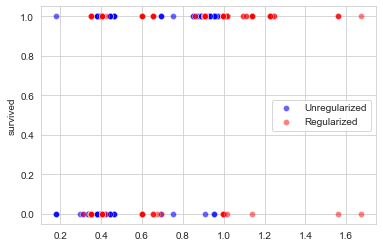

(0.10399590279312565, 0.35964522284113465)

In [283]:
#2.3 Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

from sklearn.metrics import r2_score

#Regularization is a method for “constraining” or “regularizing” the size of the coefficients, thus “shrinking” them towards zero.
#it reduces model variance and thus minimizes overfitting



est = sm.OLS(y, x_model_2).fit(cov_type='HC2')

#shrinks coef toward zero, but they rarely reach zero 
est_ridge = sm.OLS(y, x_model_2).fit_regularized(L1_wt=0)

#lasso shrinks coef all the wayy to zero, removing them from the model 

est_lasso = sm.OLS(y, x_model_2).fit_regularized(L1_wt=1)

#predict without ridge
y_hat = est.predict(x_model_2) 

#Predict x values with ridge
y_hat_ridge = est_ridge.predict(x_model_2) 
#Predict x values with lasso
y_hat_lasso = est_lasso.predict(x_model_2) 



#Plot the regularized vs unregularized models
sns.set_style('whitegrid')
sns.scatterplot(x=y_hat,y=y,color='blue',alpha=.6,label='Unregularized')

#Can also set x to est.fittedvalues? or est_ridge.fittedvalues...
sns.scatterplot(x=y_hat_ridge,y=y,color='red',alpha=.5,label='Regularized')
plt.show()


r2_score(y,y_hat_ridge), r2_score(y, y_hat_lasso) 

#Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.


# Ridge seems slightly better 

# House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [242]:
txt = open('data/house_price_data_description.txt','r')
print(txt.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [234]:
df_house = pd.read_csv('data/house_price.csv')
df_house.head(5)
df_house.columns

df_house.isnull().sum().sort_values(ascending=False).head(20)



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [244]:
fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

for var in fill_na:
    df_house[var] = df_house[var].fillna('NaN')

#I found while browsing that a good way to fill na is with the mean of the colums
 
df_house['LotFrontage'] = df_house['LotFrontage'].fillna(df_house.LotFrontage.mean())
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].fillna(df_house.GarageYrBlt.mean())
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('int64')


#MasVnrArea fill with 0 cause i think if there is no value it means its = to 0 
df_house.MasVnrArea = df_house.MasVnrArea.fillna(0)

#dropping the last na
df_house = df_house.dropna()

df_house.isnull().sum().sort_values(ascending=False).head(20)


SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

In [257]:
#categorical features 

categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities","LotConfig", "LandSlope","Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

#continous feature 

countinuous_feature = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]


#drop columns 

drop_colums = ['SalePrice', 'Id', 'SalePrice_log']


In [310]:
x = df_house.copy()

columns = x.columns
columns

#lets automate the process of dropping columns, adding poly and dummies

for col in columns: 

    if col in drop_colums:
        x = x.drop(columns = [col])
    
    elif col in categorical_features:
        name = col + "_"
        x = x.join(pd.get_dummies(x[col], drop_first= True, prefix = name))
        x = x.drop(columns = [col])

    elif col in countinuous_feature:
        x[col] = x[col].astype(int)
        name = col + "_2"
        x[name] = x[col] ** 2
        name = col + '_3'
        x[name] = x[col] ** 3

x.columns


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleType__New', 'SaleType__Oth',
       'SaleType__WD', 'SaleCondition__AdjLand', 'SaleCondition__Alloca',
       'SaleCondition__Family', 'SaleCondition__Normal',
       'SaleCondition__Partial'],
      dtype='object', length=326)

<AxesSubplot:>

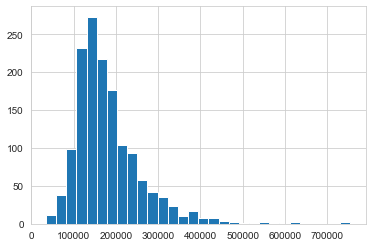

In [263]:
df_house.SalePrice.hist(bins=30)

<AxesSubplot:>

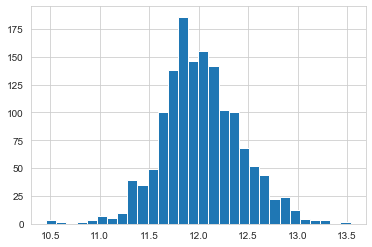

In [267]:
#the sales price isnt looking like a normal distribution, let,s try to use the log to normalize it 

df_house['SalePrice_log'] = df_house['SalePrice'].apply(np.log)
df_house.SalePrice_log.hist(bins=30)

#looking way better in term of normal distribution 

In [311]:
#first model 

y = df_house['SalePrice_log']

x = sm.add_constant(x)

x
est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

#the r-squared is pretty high but i dont think it,s representative with all the feature. Also the AIC and BIC is pretty high 

C:\Users\Yuri\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 326, but rank is 275
  warnings.warn('covariance of constraints does not have full '


0.075       0.085
HouseStyle__1.5Unf         0.1629      0.185      0.882      0.378      -0.199       0.525
HouseStyle__1Story        -0.0119      0.044     -0.273      0.785      -0.097       0.074
HouseStyle__2.5Fin        -0.0359      0.102     -0.352      0.725      -0.236       0.164
HouseStyle__2.5Unf         0.0141      0.093      0.151      0.880      -0.169       0.197
HouseStyle__2Story        -0.0258      0.041     -0.626      0.531      -0.107       0.055
HouseStyle__SFoyer         0.0209      0.060      0.350      0.727      -0.096       0.138
HouseStyle__SLvl           0.0425      0.055      0.779      0.436      -0.064       0.149
OverallQual__2             0.4534      0.158      2.866      0.004       0.143       0.764
OverallQual__3             0.5052      0.125      4.033      0.000       0.260       0.751
OverallQual__4             0.5586      0.120      4.657      0.000       0.324       0.794
OverallQual__5             0.5831      0.122      4.761      0.000       0.343       0.823
OverallQual__6             0.6058      0.123      4.938      0.000       0.365       0.846
OverallQual__7             0.6350      0.122      5.190      0.000       0.395       0.875
OverallQual__8             0.6864      0.122      5.614      0.000       0.447       0.926
OverallQual__9             0.7504      0.123      6.102      0.000       0.509       0.991
OverallQual__10            0.7751      0.125      6.222      0.000       0.531       1.019
OverallCond__2             1.4745      0.575      2.566      0.010       0.348       2.601
OverallCond__3             1.3419      0.567      2.368      0.018       0.231       2.452
OverallCond__4             1.4046      0.569      2.469      0.014       0.290       2.520
OverallCond__5             1.4523      0.567      2.560      0.010       0.340       2.564
OverallCond__6             1.4881      0.567      2.625      0.009       0.377       2.599
OverallCond__7             1.5250      0.567      2.690      0.007       0.414       2.636
OverallCond__8             1.5420      0.567      2.721      0.007       0.431       2.653
OverallCond__9             1.6012      0.569      2.813      0.005       0.485       2.717
RoofStyle__Gable           0.0136      0.072      0.189      0.850      -0.128       0.155
RoofStyle__Gambrel        -0.0164      0.084     -0.196      0.845      -0.181       0.148
RoofStyle__Hip             0.0139      0.072      0.193      0.847      -0.128       0.155
RoofStyle__Mansard         0.0392      0.086      0.458      0.647      -0.129       0.207
RoofStyle__Shed            0.5266      0.169      3.111      0.002       0.195       0.858
RoofMatl__CompShg         -1.5053      2.475     -0.608      0.543      -6.356       3.346
RoofMatl__Membran         -1.0136      2.465     -0.411      0.681      -5.845       3.818
RoofMatl__Metal           -1.1767      2.466     -0.477      0.633      -6.010       3.657
RoofMatl__Roll            -1.4878      2.467     -0.603      0.546      -6.322       3.347
RoofMatl__Tar&Grv         -1.4905      2.479     -0.601      0.548      -6.349       3.368
RoofMatl__WdShake         -1.4992      2.466     -0.608      0.543      -6.332       3.334
RoofMatl__WdShngl         -1.3728      2.458     -0.559      0.576      -6.189       3.444
Exterior1st__AsphShn      -0.0206      0.108     -0.191      0.848      -0.231       0.190
Exterior1st__BrkComm      -0.2446      0.245     -0.997      0.319      -0.726       0.236
Exterior1st__BrkFace       0.0912      0.065      1.405      0.160      -0.036       0.218
Exterior1st__CBlock       -0.0920      0.053     -1.732      0.083      -0.196       0.012
Exterior1st__CemntBd      -0.0663      0.087     -0.766      0.444      -0.236       0.103
Exterior1st__HdBoard       0.0009      0.066      0.013      0.990      -0.128       0.130
Exterior1st__ImStucc      -0.0236      0.076     -0.309      0.757      -0.173       0.126
Exterior1st__MetalSd       0.0544      0.076      0.721      0.471   

In [312]:

#x = x.drop(columns = ["LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"])
#x = x.drop(columns = ["1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "HalfBath"])
#x = x.drop(columns = ["BedroomAbvGr", "TotRmsAbvGrd", "GarageYrBlt", "EnclosedPorch", "3SsnPorch", "MiscVal"]) #the bic went up but the ACI went down
# x = x.drop(columns = ["MSSubClass__30", "MSSubClass__40", "MSSubClass__45", "MSSubClass__50", "MSSubClass__60",
#                       "MSSubClass__70", "MSSubClass__75", "MSSubClass__80", "MSSubClass__85", "MSSubClass__90", 
#                       "MSSubClass__120", "MSSubClass__160", "MSSubClass__180", "MSSubClass__190"]
#                       )
#x = x.drop(columns = ["WoodDeckSF", "LowQualFinSF", "LotFrontage^2", "LotFrontage^3", "LotArea^3", "Alley__NA", "Alley__Pave"])
#x = x.drop(columns = ["LotShape__IR2", "LotShape__IR3", "LotShape__Reg"])
#x = x.drop(columns = ["LandContour__HLS", "LandContour__Low", "LandContour__Lvl", "Utilities__NoSeWa"])
#x = x.drop(columns = ["LotConfig__CulDSac", "LotConfig__FR2", "LotConfig__FR3", "LotConfig__Inside", "LandSlope__Mod"])
# x = x.drop(columns = ["Neighborhood__Blueste", "Neighborhood__BrDale", "Neighborhood__BrkSide", "Neighborhood__ClearCr",
#                      "Neighborhood__CollgCr", "Neighborhood__Gilbert", "Neighborhood__IDOTRR", "Neighborhood__NAmes",
#                      "Neighborhood__NPkVill", "Neighborhood__NWAmes", "Neighborhood__OldTown", "Neighborhood__SWISU",
#                      "Neighborhood__Sawyer", "Neighborhood__SawyerW", "Neighborhood__Somerst", "Neighborhood__Timber",
#                      "Neighborhood__Veenker", "Neighborhood__Crawfor", "Neighborhood__NoRidge"])

#we could over like this to optmize the model as much as possible. 

#we could over like this to optmize the model as much as possible. 